<a href="https://colab.research.google.com/github/Rabaanie/Kaggle-Python/blob/main/Concrete_Strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Concrete Strength Analysis

**Import Library**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

**Read file and create a dataframe**

In [ ]:
#Read and display the csv file
df = pd.read_csv("concrete.csv")
display(df.head(5))
print(f"There are {len(df)} rows in your data frame.")

id  CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
0   0            525.0               0.0              0.0           186.0   
1   1            143.0             169.0            143.0           191.0   
2   2            289.0             134.7              0.0           185.7   
3   3            304.0              76.0              0.0           228.0   
4   4            157.0             236.0              0.0           192.0   

   SuperplasticizerComponent  CoarseAggregateComponent  \
0                        0.0                    1125.0   
1                        8.0                     967.0   
2                        0.0                    1075.0   
3                        0.0                     932.0   
4                        0.0                     935.4   

   FineAggregateComponent  AgeInDays  Strength  
0                   613.0          3     10.38  
1                   643.0         28     23.52  
2                   795.3         28     36.96  
3                   670.0        365     39.05  
4                   781.2         90     74.19

There are 5407 rows in your data frame.


**Data cleaning**

In [ ]:
#Check for NAN values
nan_values = df.isna().sum()
nan_values

id                           0
CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

**Exploratory Data Analysis (EDA)**

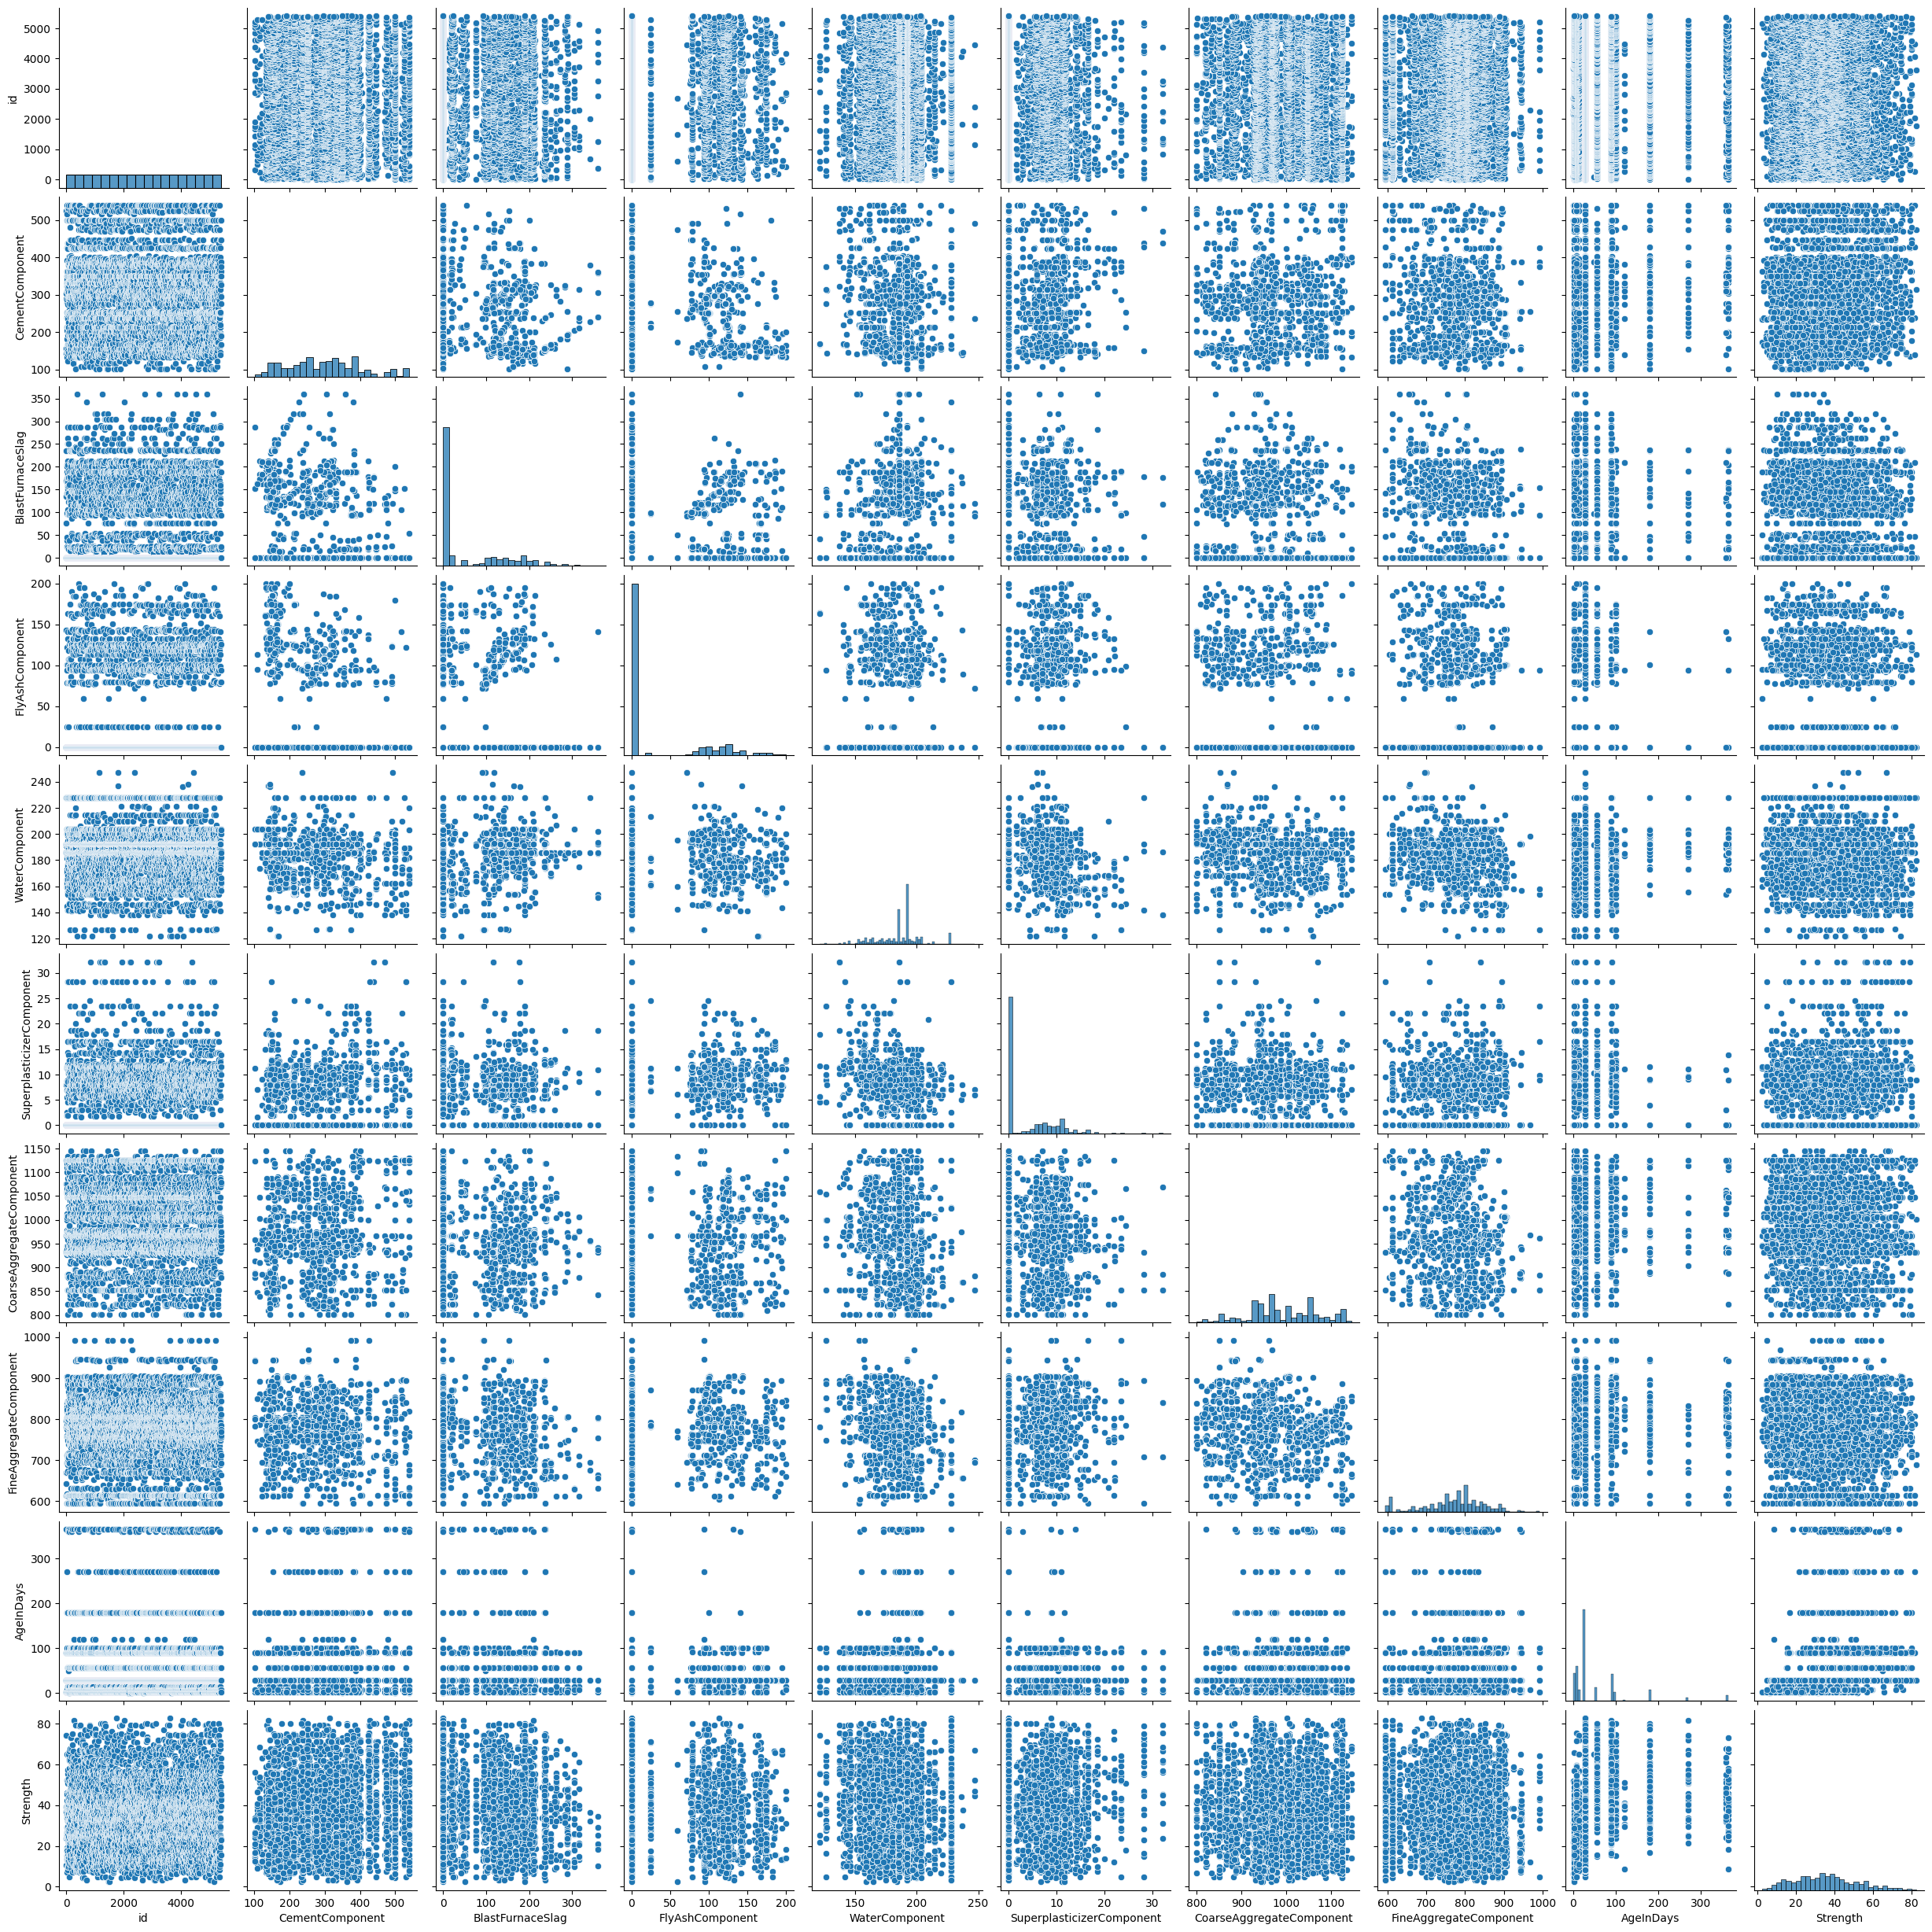

In [ ]:
#Pairplot, this step may takes a while to load
sns.pairplot(df)

<Axes: >

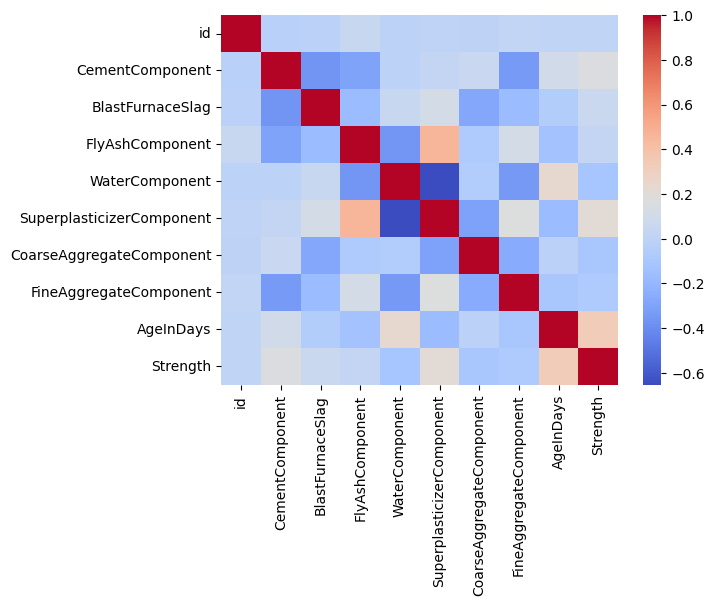

In [ ]:
#Heatmap
sns.heatmap(df.corr(), cmap="coolwarm")

<ipython-input-4-8d5719ea5e0f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Strength'])


<Axes: xlabel='Strength', ylabel='Density'>

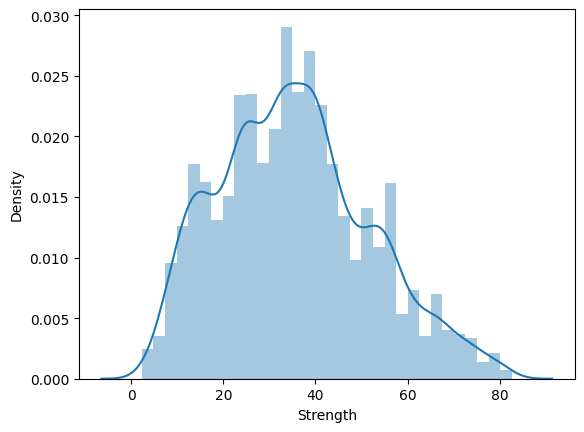

In [ ]:
#Histogram
sns.distplot(df['Strength'])

**Remove Outliners**

In [ ]:
# Calculating the IQR for the 'Strength' column
Q1 = df['Strength'].quantile(0.25)
Q3 = df['Strength'].quantile(0.75)
IQR = Q3 - Q1

# Defining the range for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out the outliers
df_no_outliers = df[(df['Strength'] >= lower_bound) & (df['Strength'] <= upper_bound)]

# Displaying the number of rows after removing outliers
print(f"There are {len(df_no_outliers)} rows in your data frame.")

There are 5374 rows in your data frame.


In [ ]:
#Display the column names
df.columns

Index(['id', 'CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

**Create a linear regression model**

In [ ]:
# Preparing the dataset for linear regression
X = df_no_outliers[['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays']]
y = df_no_outliers['Strength']

X.head()

CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
0            525.0               0.0              0.0           186.0   
1            143.0             169.0            143.0           191.0   
2            289.0             134.7              0.0           185.7   
3            304.0              76.0              0.0           228.0   
4            157.0             236.0              0.0           192.0   

   SuperplasticizerComponent  CoarseAggregateComponent  \
0                        0.0                    1125.0   
1                        8.0                     967.0   
2                        0.0                    1075.0   
3                        0.0                     932.0   
4                        0.0                     935.4   

   FineAggregateComponent  AgeInDays  
0                   613.0          3  
1                   643.0         28  
2                   795.3         28  
3                   670.0        365  
4                   781.2         90

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Training the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Model evaluation**

In [ ]:
#print intercept
print(f"The intercept is {lr.intercept_}.")

The intercept is 39.71987165270025.


In [ ]:
#Display coefficient
coeff = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff

Coefficient
CementComponent               0.024218
BlastFurnaceSlag              0.021566
FlyAshComponent               0.007798
WaterComponent               -0.075081
SuperplasticizerComponent     0.525088
CoarseAggregateComponent     -0.002509
FineAggregateComponent       -0.004541
AgeInDays                     0.087967

**Predictions**

In [ ]:
# Predicting on the test set
y_pred = lr.predict(X_test)

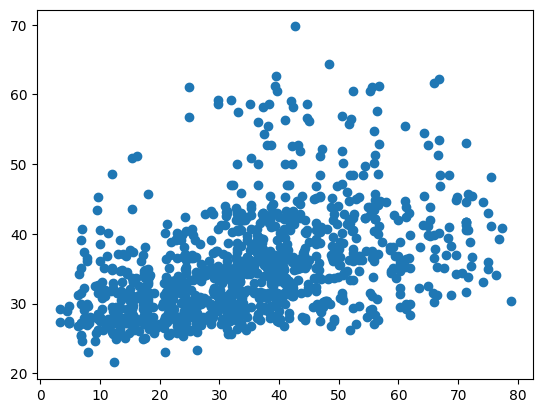

In [ ]:
# Plot test vs. predicted values
plt.scatter(y_test,y_pred)

**Regression Evaluation Metrics**

In [ ]:
#Calculate error values
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 11.338134444993033
MSE: 206.71208655320422
RMSE: 14.37748540438154
